In [1]:
###################################################
# Autor: Fernando Cardoso e Sandro Camargo
# Disciplina: Bioestatística
# Universidade Federal do Pampa - Bagé - PPGCAP
#
# Exemplo 2 - Dose de adubo nitrogenado x Produção de milho
# ANOVA da Regressão com repetição
###################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [6]:
# === 1. Leitura dos dados ===
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/rl-milho.txt", sep=r"\s+", header=0)
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dose    16 non-null     int64
 1   prod    16 non-null     int64
dtypes: int64(2)
memory usage: 388.0 bytes


,dose,prod
0,0,49
1,0,47
2,0,52
3,0,50
4,100,53


In [7]:
# === 2. ANOVA usual (tratamento como fator) ===
dados["trat"] = dados["dose"].astype("category")

modelo = smf.ols("prod ~ dose", data=dados).fit()
print("=== Modelo de regressão simples ===")
print(modelo.summary())

print("\n=== ANOVA usual ===")
anova_geral = sm.stats.anova_lm(modelo, typ=2)
print(anova_geral)

=== Modelo de regressão simples ===
                            OLS Regression Results                            
Dep. Variable:                   prod   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     22.04
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           0.000345
Time:                        14:15:54   Log-Likelihood:                -48.776
No. Observations:                  16   AIC:                             101.6
Df Residuals:                      14   BIC:                             103.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49

In [8]:
# === 3. Decomposição da SQTratamento ===
# SQTratamento = SQRegressão + SQFalta de Ajuste
desd_modelo = smf.ols("prod ~ dose + trat", data=dados).fit()
anova_desd = sm.stats.anova_lm(desd_modelo, typ=2)
print("\n=== ANOVA com decomposição (dose + trat) ===")
print(anova_desd)

# Coeficiente de determinação (r²)
SQReg = anova_desd.loc["dose", "sum_sq"]
SQTrat = SQReg + anova_desd.loc["trat", "sum_sq"]
r2 = SQReg / SQTrat
print(f"\nCoeficiente de Determinação (r²) = {r2:.3f}")


=== ANOVA com decomposição (dose + trat) ===
              sum_sq    df          F    PR(>F)
trat      666.686269   3.0   6.580494  0.007035
dose      551.120000   1.0  16.319408  0.001640
Residual  405.250000  12.0        NaN       NaN

Coeficiente de Determinação (r²) = 0.453



Modelo ajustado: y = 49.97500 + 0.05725x


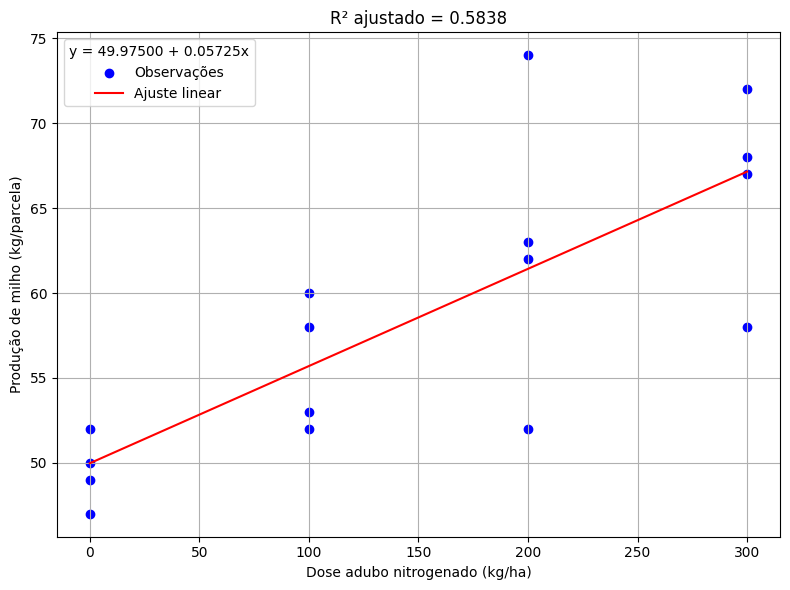

In [9]:
# === 4. Ajuste final e gráfico ===
modelo_ajustado = modelo  # mesmo modelo linear simples

b0, b1 = modelo_ajustado.params
print(f"\nModelo ajustado: y = {b0:.5f} + {b1:.5f}x")

# Geração do gráfico
plt.figure(figsize=(8, 6))
plt.scatter(dados["dose"], dados["prod"], color="blue", label="Observações")

# linha de regressão
x_vals = pd.Series(sorted(dados["dose"]))
y_vals = b0 + b1 * x_vals
plt.plot(x_vals, y_vals, color="red", label="Ajuste linear")

plt.xlabel("Dose adubo nitrogenado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.title(f"R² ajustado = {modelo_ajustado.rsquared_adj:.4f}")
plt.legend(title=f"y = {b0:.5f} + {b1:.5f}x", loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()